In [32]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [33]:
#import libraries
import rdflib  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [34]:
import os
csv_file = r"C:\Users\Lenovo\Downloads\CA ONE\Tourism-data.csv"
print("File exists:", os.path.exists(csv_file))
# Display the first few rows of the dataset
df = pd.read_csv(csv_file, encoding='utf-8')
print(df.head())

File exists: True
            Name                                             Review  Ratings  \
0  Tariq Mehmood  The hotel’s location of Shahrahe Faisal is pri...      5.0   
1     Sohaib Ali  Booked Business class room for 2 nights with m...      5.0   
2        Sarah H  Wonderful experience. Very comfortable and cle...      5.0   
3      Nimeesh L  The atmosphere at the Hotel is very welcoming ...      4.0   
4        Fawad K  The best hotel.. hands down. From humera and f...      5.0   

                 Hotels  
0  Avari Towers Karachi  
1  Avari Towers Karachi  
2  Avari Towers Karachi  
3  Avari Towers Karachi  
4  Avari Towers Karachi  


Missing values in each column:
Name                     5
Review                   0
Ratings                  6
Hotels                   5
Rating_Category          6
Rating_Category_Label    0
dtype: int64

Removing missing values...
Missing values removed. Cleaned data:
            Name                                             Review  Ratings  \
0  Tariq Mehmood  The hotel’s location of Shahrahe Faisal is pri...      5.0   
1     Sohaib Ali  Booked Business class room for 2 nights with m...      5.0   
2        Sarah H  Wonderful experience. Very comfortable and cle...      5.0   
3      Nimeesh L  The atmosphere at the Hotel is very welcoming ...      4.0   
4        Fawad K  The best hotel.. hands down. From humera and f...      5.0   

                 Hotels Rating_Category  Rating_Category_Label  
0  Avari Towers Karachi       Excellent                      1  
1  Avari Towers Karachi       Excellent                      1  
2  Avari Towers Karachi       Excellent             

C:\Users\PMLS\AppData\Local\Temp\ipykernel_36616\2224775483.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hotels_Encoded'] = label_encoder.fit_transform(df['Hotels'])


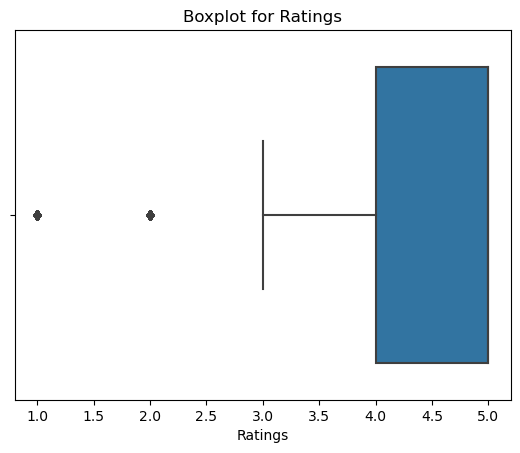


Removed outliers from Ratings.

Feature scaling applied on 'Ratings' column.
   Ratings  Ratings_Scaled
0      5.0        0.577837
1      5.0        0.577837
2      5.0        0.577837
3      4.0       -1.014426
4      5.0        0.577837

Found 8 duplicate rows. Removing them...
Duplicates removed. Cleaned data:
            Name                                             Review  Ratings  \
0  Tariq Mehmood  The hotel’s location of Shahrahe Faisal is pri...      5.0   
1     Sohaib Ali  Booked Business class room for 2 nights with m...      5.0   
2        Sarah H  Wonderful experience. Very comfortable and cle...      5.0   
3      Nimeesh L  The atmosphere at the Hotel is very welcoming ...      4.0   
4        Fawad K  The best hotel.. hands down. From humera and f...      5.0   

                 Hotels Rating_Category  Rating_Category_Label  \
0  Avari Towers Karachi       Excellent                      1   
1  Avari Towers Karachi       Excellent                      1   
2  Av

In [55]:
#Pre-Processsing steps
# Step 1: Check for Missing Values
def check_missing_values(df):
    missing_values = df.isnull().sum()
    print("Missing values in each column:")
    print(missing_values)
    
    # If any missing values are found, remove them
    if missing_values.any():
        print("\nRemoving missing values...")
        df_cleaned = df.dropna()  # Removing rows with missing values
        print("Missing values removed. Cleaned data:")
        print(df_cleaned.head())
    else:
        print("\nNo missing values found in the dataset.")
    return df_cleaned

# Step 2: Handle Categorical Data (e.g., Encoding Labels)
def encode_categorical_data(df):
    label_encoder = LabelEncoder()
    
    # Example: Encoding 'Hotels' column (if categorical)
    if df['Hotels'].dtype == 'object':
        print("\nEncoding categorical column 'Hotels'...")
        df['Hotels_Encoded'] = label_encoder.fit_transform(df['Hotels'])
        print(df[['Hotels', 'Hotels_Encoded']].head())
    
    return df

# Step 3: Remove Outliers (if needed)
def remove_outliers(df, column_name):
    # Boxplot to identify outliers
    sns.boxplot(data=df, x=column_name)
    plt.title(f"Boxplot for {column_name}")
    plt.show()
    
    # Remove rows where values are outside 1.5 * IQR (Interquartile Range)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    print(f"\nRemoved outliers from {column_name}.")
    return df_cleaned

# Step 4: Feature Scaling (Normalize or Standardize)
def scale_features(df):
    scaler = StandardScaler()
    
    # Scale 'Ratings' column (or any numeric columns)
    df['Ratings_Scaled'] = scaler.fit_transform(df[['Ratings']])
    
    print("\nFeature scaling applied on 'Ratings' column.")
    print(df[['Ratings', 'Ratings_Scaled']].head())
    
    return df

# Step 5: Check and Remove Duplicate Rows
def remove_duplicates(df):
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"\nFound {duplicates} duplicate rows. Removing them...")
        df_cleaned = df.drop_duplicates()
        print("Duplicates removed. Cleaned data:")
        print(df_cleaned.head())
    else:
        print("\nNo duplicate rows found.")
    return df_cleaned

# Step 6: Final Data Cleaning Summary
def summarize_cleaning(df):
    print("\nFinal Data Summary:")
    print(df.info())
    print("\nDataset head after all preprocessing:")
    print(df.head())

# Perform Preprocessing Steps
df_cleaned = check_missing_values(df)
df_cleaned = encode_categorical_data(df_cleaned)
df_cleaned = remove_outliers(df_cleaned, 'Ratings')  # Example for 'Ratings' column
df_cleaned = scale_features(df_cleaned)
df_cleaned = remove_duplicates(df_cleaned)
summarize_cleaning(df_cleaned)

# Optionally, save the cleaned dataset to a new CSV
df_cleaned.to_csv('cleaned_dataset.csv', index=False)


In [50]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Check if there are any missing values
if missing_values.any():
    print("Missing values found in the following columns:")
    print(missing_values[missing_values > 0])
else:
    print("The dataset has no missing values.")

Missing values found in the following columns:
Name               5
Ratings            6
Hotels             5
Rating_Category    6
dtype: int64


In [51]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Display the cleaned dataset
print(df_cleaned)

               Name                                             Review  \
0     Tariq Mehmood  The hotel’s location of Shahrahe Faisal is pri...   
1        Sohaib Ali  Booked Business class room for 2 nights with m...   
2           Sarah H  Wonderful experience. Very comfortable and cle...   
3         Nimeesh L  The atmosphere at the Hotel is very welcoming ...   
4           Fawad K  The best hotel.. hands down. From humera and f...   
...             ...                                                ...   
6759     Zaman Khan  went there with family and had amazing time . ...   
6760       David. T  What a fine Boutique Hotel in beautiful valley...   
6761    Nuzhat_Syed  New small Hotel, very neat and clean rooms. si...   
6762       Tahira S  Stayed for two days, newly built Hotel, very n...   
6763       Sajjad H  visited kalam and stayed in this botique hotel...   

      Ratings                      Hotels Rating_Category  \
0         5.0        Avari Towers Karachi       Ex

In [52]:
# Remove columns with missing values
df_cleaned = df.dropna(axis=1)

# Display the cleaned dataset
print(df_cleaned)

                                                 Review  Rating_Category_Label
0     The hotel’s location of Shahrahe Faisal is pri...                      1
1     Booked Business class room for 2 nights with m...                      1
2     Wonderful experience. Very comfortable and cle...                      1
3     The atmosphere at the Hotel is very welcoming ...                      2
4     The best hotel.. hands down. From humera and f...                      1
...                                                 ...                    ...
6759  went there with family and had amazing time . ...                      1
6760  What a fine Boutique Hotel in beautiful valley...                      1
6761  New small Hotel, very neat and clean rooms. si...                      1
6762  Stayed for two days, newly built Hotel, very n...                      1
6763  visited kalam and stayed in this botique hotel...                      1

[6764 rows x 2 columns]


In [54]:
# Check for missing values in the cleaned dataset
missing_values_after_cleaning = df_cleaned.isnull().sum()

# Verify if there are any missing values left
if missing_values_after_cleaning.any():
    print("There are still missing values in the dataset.")
else:
    print("The dataset has no missing values.")

The dataset has no missing values.


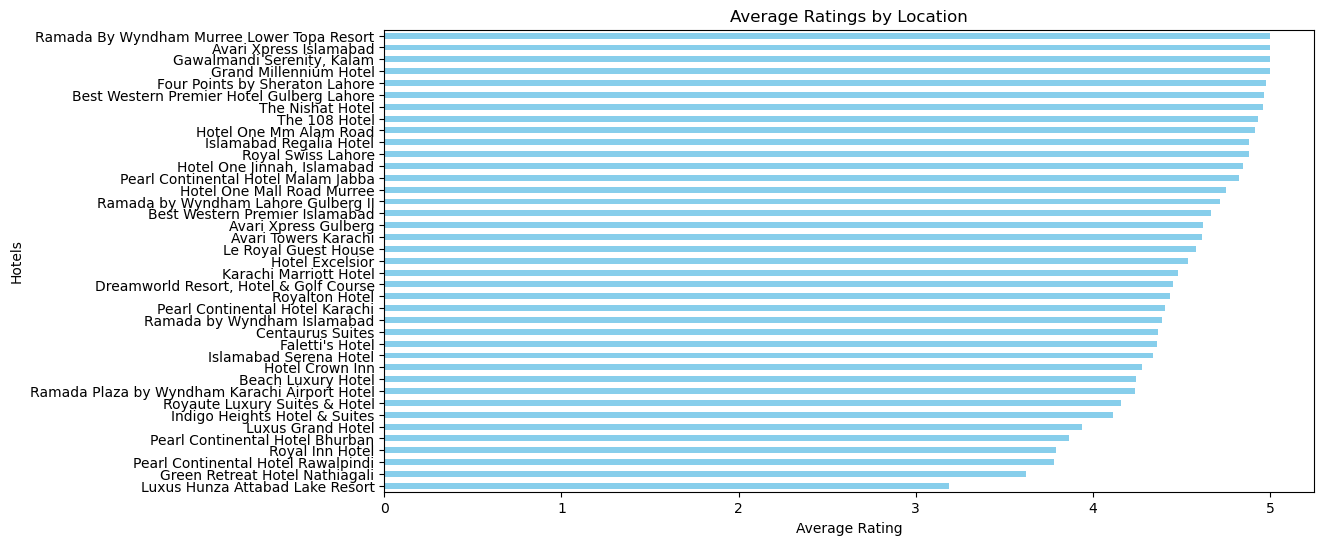

In [5]:
# 2. Average Ratings by Location (assuming Location column exists)
plt.figure(figsize=(12, 6))
avg_ratings = df.groupby('Hotels')['Ratings'].mean().sort_values()
avg_ratings.plot(kind='barh', color='skyblue')
plt.title('Average Ratings by Location')
plt.xlabel('Average Rating')
plt.ylabel('Hotels')
plt.show()

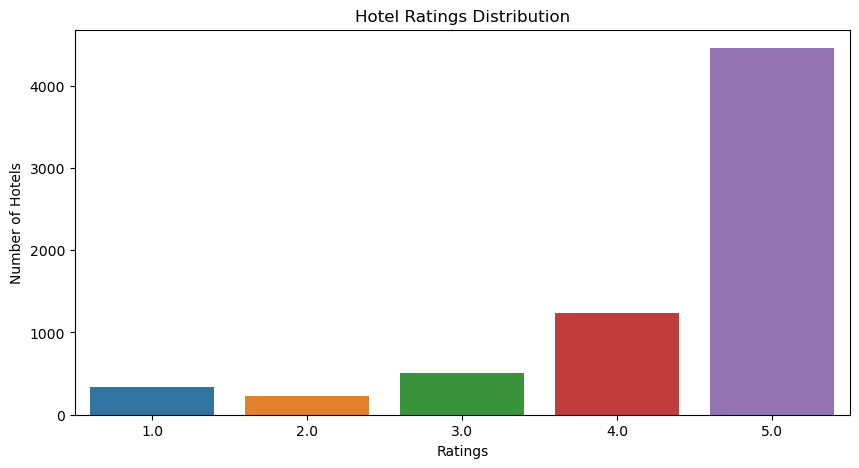

In [6]:
# Bar Graph of Hotel Ratings
plt.figure(figsize=(10, 5))
sns.countplot(x='Ratings', data=df)
plt.title('Hotel Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Number of Hotels')
plt.show()


In [15]:
pip install textblob --default-timeout=100


  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 262.6 kB/s eta 0:00:03
   - ------------------------------------- 30.7/626.3 kB 262.6 kB/s eta 0:00:03
   - ------------------------------------- 30.7/626.3 kB 262.6 kB/s eta 0:00:03
   - ------------------------------------- 30.7/626.3 kB 262.6 kB/s eta 0:00:03
   - ------------------------------------- 

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\PMLS\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\PMLS\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\PMLS\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\PMLS\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\PMLS\anaconda3\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\PMLS\anaconda3\Lib\socket.py", line 706, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^

In [22]:
# Sample data structure (replace this with your actual dataset loading code)
# df = pd.DataFrame({'Ratings': [4, 5, 3, 2, 5, ...], 'Reviews': ["good", "outstanding", "average", "not good", ...]})

# Step 1: Define a mapping of review words to sentiment categories
sentiment_mapping = {
    "good": "Positive",
    "average": "Neutral",
    "excellent": "Positive",
    "perfect": "Positive",
    "outstanding": "Positive",
    "fine": "Neutral",
    "not good": "Negative"
}

# Step 2: Map the reviews to sentiments, handling unmatched values with 'Unknown'
df['Sentiment'] = df['Review'].map(sentiment_mapping).fillna('Unknown')

# Step 3: Filter out 'Unknown' values if they are not relevant
df = df[df['Sentiment'] != 'Unknown']

# Check if df is empty after filtering
if df.empty:
    print("No data available for the specified sentiment categories. Please check the dataset and mappings.")
else:
    # Step 4: Visualize Ratings by Sentiment Category
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Ratings', hue='Sentiment', data=df, palette="viridis")
    plt.title('Distribution of Hotel Ratings by Sentiment of Reviews')
    plt.xlabel('Ratings')
    plt.ylabel('Count of Reviews')
    plt.legend(title='Sentiment')
    plt.show()


No data available for the specified sentiment categories. Please check the dataset and mappings.


In [24]:
# Step 1: Define a mapping of review words to sentiment categories
sentiment_mapping = {
    "good": "Positive",
    "average": "Neutral",
    "excellent": "Positive",
    "perfect": "Positive",
    "outstanding": "Positive",
    "fine": "Neutral",
    "not good": "Negative"
}

# Step 2: Map the reviews to sentiments, handling unmatched values with 'Unknown'
df['Sentiment'] = df['Review'].map(sentiment_mapping).fillna('Unknown')

# Step 3: Print DataFrame after mapping for debugging
print("DataFrame after mapping sentiments:")
print(df.head())

# Step 4: Filter out 'Unknown' values if they are not relevant
df = df[df['Sentiment'] != 'Unknown']

# Additional check for NaN values
print("\nChecking for NaN values in Ratings or Sentiment columns:")
print(df[['Ratings', 'Sentiment']].isna().sum())

# Check if df is empty after filtering
if df.empty:
    print("No data available for the specified sentiment categories. Please check the dataset and mappings.")
else:
    # Step 5: Visualize Ratings by Sentiment Category
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Ratings', hue='Sentiment', data=df, palette="viridis")
    plt.title('Distribution of Hotel Ratings by Sentiment of Reviews')
    plt.xlabel('Ratings')
    plt.ylabel('Count of Reviews')
    plt.legend(title='Sentiment')
    plt.show()

DataFrame after mapping sentiments:
Empty DataFrame
Columns: [Name, Review, Ratings, Hotels, Sentiment]
Index: []

Checking for NaN values in Ratings or Sentiment columns:
Ratings      0.0
Sentiment    0.0
dtype: float64
No data available for the specified sentiment categories. Please check the dataset and mappings.


In [26]:
# Step 1: Convert all reviews to lowercase to ensure case-insensitive matching
df['Review'] = df['Review'].str.lower()

# Step 2: Define a mapping of review words to sentiment categories
sentiment_mapping = {
    "good": "Positive",
    "average": "Neutral",
    "excellent": "Positive",
    "perfect": "Positive",
    "outstanding": "Positive",
    "fine": "Neutral",
    "not good": "Negative"
}

# Step 3: Display unique review words to check if they match the mapping keys
print("Unique review words in dataset:")
print(df['Review'].unique())

# Step 4: Map the reviews to sentiments, handling unmatched values with 'Unknown'
df['Sentiment'] = df['Review'].map(sentiment_mapping).fillna('Unknown')

# Step 5: Print DataFrame after mapping for debugging
print("\nDataFrame after mapping sentiments:")
print(df.head())

# Step 6: Filter out 'Unknown' values if they are not relevant
df = df[df['Sentiment'] != 'Unknown']

# Check if df is empty after filtering
if df.empty:
    print("No data available for the specified sentiment categories. Please check the dataset and mappings.")
else:
    # Step 7: Visualize Ratings by Sentiment Category
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Ratings', hue='Sentiment', data=df, palette="viridis")
    plt.title('Distribution of Hotel Ratings by Sentiment of Reviews')
    plt.xlabel('Ratings')
    plt.ylabel('Count of Reviews')
    plt.legend(title='Sentiment')
    plt.show()


Unique review words in dataset:
[]

DataFrame after mapping sentiments:
Empty DataFrame
Columns: [Name, Review, Ratings, Hotels, Sentiment]
Index: []
No data available for the specified sentiment categories. Please check the dataset and mappings.


In [27]:
# Step 1: Convert all reviews to lowercase to ensure case-insensitive matching
df['Review'] = df['Review'].str.lower()

# Step 2: Define a mapping of review words to sentiment categories
sentiment_mapping = {
    "good": "Positive",
    "average": "Neutral",
    "excellent": "Positive",
    "perfect": "Positive",
    "outstanding": "Positive",
    "fine": "Neutral",
    "not good": "Negative"
}

# Step 3: Display unique review words to check if they match the mapping keys
print("Unique review words in dataset:")
print(df['Review'].unique())

Unique review words in dataset:
[]


Categorized DataFrame:
                 Hotels  Ratings Rating_Category
0  Avari Towers Karachi      5.0       Excellent
1  Avari Towers Karachi      5.0       Excellent
2  Avari Towers Karachi      5.0       Excellent
3  Avari Towers Karachi      4.0            Good
4  Avari Towers Karachi      5.0       Excellent

Grouped Hotels Based on Rating Category:
  Rating_Category                                             Hotels
0         Average  [Avari Towers Karachi, Avari Towers Karachi, A...
1       Excellent  [Avari Towers Karachi, Avari Towers Karachi, A...
2            Good  [Avari Towers Karachi, Avari Towers Karachi, A...
3            Poor  [Avari Towers Karachi, Avari Towers Karachi, A...
4         Unknown  [nan, nan, nan, nan, nan, Gawalmandi Serenity,...


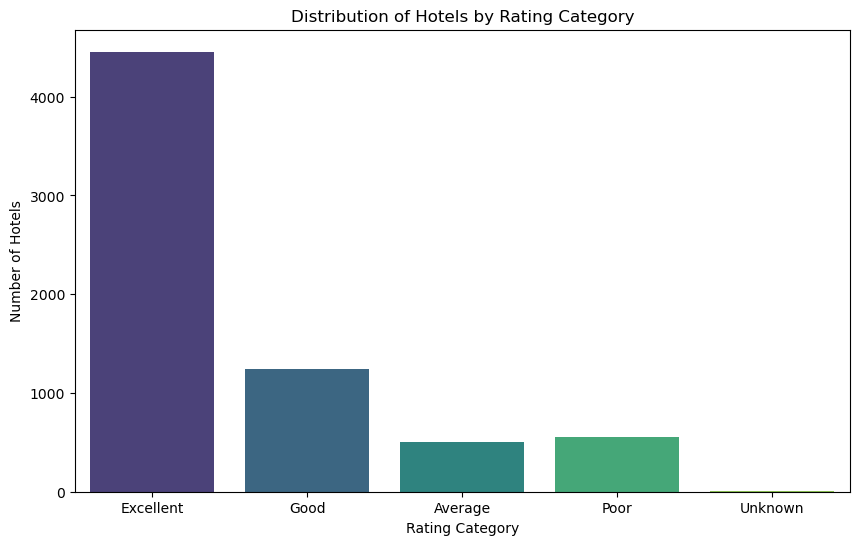

In [36]:
# Step 1: Define a function to categorize ratings
def categorize_rating(rating):
    if rating == 5:
        return "Excellent"
    elif rating == 4:
        return "Good"
    elif rating == 3:
        return "Average"
    elif rating <= 2:  # Rating of 1 or 0 is categorized as Poor
        return "Poor"
    else:
        return "Unknown"  # In case there are any invalid ratings

# Step 2: Apply the categorization function to the Ratings column
df['Rating_Category'] = df['Ratings'].apply(categorize_rating)

# Step 3: Check the result of categorization
print("Categorized DataFrame:")
print(df[['Hotels', 'Ratings', 'Rating_Category']].head())

# Step 4: Group hotels based on the rating category
grouped_hotels = df.groupby('Rating_Category')['Hotels'].apply(list).reset_index()

# Step 5: Display the grouped hotels
print("\nGrouped Hotels Based on Rating Category:")
print(grouped_hotels)

# Step 6: Optionally, you can visualize the distribution of rating categories
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Rating_Category', data=df, palette="viridis")
plt.title('Distribution of Hotels by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Number of Hotels')
plt.show()

Hotels Grouped by Rating:
   Rating                                    Hotels_in_Group
0     1.0  [Avari Towers Karachi, Avari Towers Karachi, A...
1     2.0  [Avari Towers Karachi, Avari Towers Karachi, A...
2     3.0  [Avari Towers Karachi, Avari Towers Karachi, A...
3     4.0  [Avari Towers Karachi, Avari Towers Karachi, A...
4     5.0  [Avari Towers Karachi, Avari Towers Karachi, A...

Grouped Hotels with Counts:
   Rating                                    Hotels_in_Group  Number_of_Hotels
0     1.0  [Avari Towers Karachi, Avari Towers Karachi, A...               333
1     2.0  [Avari Towers Karachi, Avari Towers Karachi, A...               225
2     3.0  [Avari Towers Karachi, Avari Towers Karachi, A...               506
3     4.0  [Avari Towers Karachi, Avari Towers Karachi, A...              1238
4     5.0  [Avari Towers Karachi, Avari Towers Karachi, A...              4456


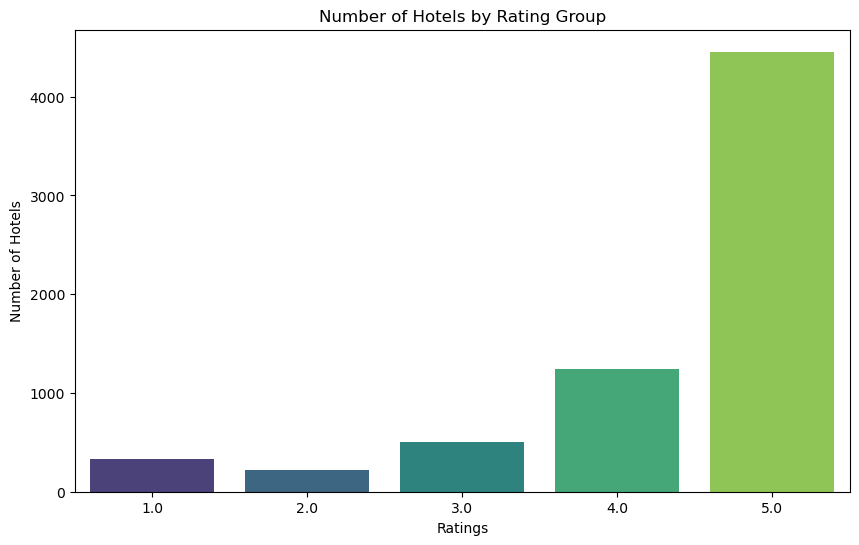

In [37]:
# Step 1: Group hotels based on the 'Ratings' column
grouped_hotels = df.groupby('Ratings')['Hotels'].apply(list).reset_index()

# Step 2: Rename columns for clarity (optional)
grouped_hotels.columns = ['Rating', 'Hotels_in_Group']

# Step 3: Display the grouped hotels
print("Hotels Grouped by Rating:")
print(grouped_hotels)

# Step 4: If you want to see the number of hotels in each rating group, add this:
grouped_hotels['Number_of_Hotels'] = grouped_hotels['Hotels_in_Group'].apply(len)

# Display the final table with counts
print("\nGrouped Hotels with Counts:")
print(grouped_hotels)

# Step 5: Visualization (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Number_of_Hotels', data=grouped_hotels, palette="viridis")
plt.title('Number of Hotels by Rating Group')
plt.xlabel('Ratings')
plt.ylabel('Number of Hotels')
plt.show()


In [41]:
# Load your dataset
import os
csv_file = r"C:\Users\PMLS\Documents\Maleeha\Maleeha Zainab\Tourism-data.csv"
print("File exists:", os.path.exists(csv_file))
# Display the first few rows of the dataset
df = pd.read_csv(csv_file, encoding='utf-8')

# Step 1: Check the column names
print("Column Names:", df.columns)

# Step 2: Handle missing values in the 'Review' column
df['Review'].fillna("", inplace=True)

# If you don’t have a 'Rating_Category' column, create it based on numeric ratings
if 'Rating_Category' not in df.columns:
    df['Rating_Category'] = pd.cut(df['Ratings'], bins=[0, 2, 3, 4, 5], 
                                   labels=["Poor", "Average", "Good", "Excellent"])
    print("Created 'Rating_Category' column based on ratings.")

# Encoding rating categories as labels
label_encoder = LabelEncoder()
df['Rating_Category_Label'] = label_encoder.fit_transform(df['Rating_Category'])

# Text feature extraction using TF-IDF for the 'Review' column
tfidf = TfidfVectorizer(max_features=500)  # Adjust max_features as needed
X_text = tfidf.fit_transform(df['Review']).toarray()

# Only using text features for simplicity here
X = X_text
y = df['Rating_Category_Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training with Random Forest (example algorithm)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


File exists: True
Column Names: Index(['Name', 'Review', 'Ratings', 'Hotels'], dtype='object')
Created 'Rating_Category' column based on ratings.
Accuracy: 0.7065779748706578
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.04      0.07        96
           1       0.73      0.99      0.84       891
           2       0.44      0.10      0.16       251
           3       0.60      0.43      0.50       114
           4       0.50      1.00      0.67         1

    accuracy                           0.71      1353
   macro avg       0.52      0.51      0.45      1353
weighted avg       0.64      0.71      0.63      1353



In [42]:
# Handle missing values in the 'Review' column
df['Review'].fillna("", inplace=True)

# If 'Rating_Category' column does not exist, create it based on ratings
if 'Rating_Category' not in df.columns:
    df['Rating_Category'] = pd.cut(df['Ratings'], bins=[0, 2, 3, 4, 5], 
                                   labels=["Poor", "Average", "Good", "Excellent"])

# Encode rating categories as numerical labels
label_encoder = LabelEncoder()
df['Rating_Category_Label'] = label_encoder.fit_transform(df['Rating_Category'])

# Text feature extraction using TF-IDF for the 'Review' column
tfidf = TfidfVectorizer(max_features=500)  # Adjust max_features as needed
X_text = tfidf.fit_transform(df['Review']).toarray()

# Only using text features for simplicity here
X = X_text
y = df['Rating_Category_Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of models to try
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": MultinomialNB()
}

# Loop over models, fit, and evaluate each one
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate and print accuracy and classification report
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Model: Logistic Regression
Accuracy: 0.7427937915742794
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.15      0.19        96
           1       0.81      0.95      0.87       891
           2       0.46      0.27      0.34       251
           3       0.70      0.69      0.70       114
           4       0.00      0.00      0.00         1

    accuracy                           0.74      1353
   macro avg       0.45      0.41      0.42      1353
weighted avg       0.70      0.74      0.71      1353



C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Model: Random Forest
Accuracy: 0.7080561714708056
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.02      0.04        96
           1       0.73      0.99      0.84       891
           2       0.47      0.08      0.14       251
           3       0.60      0.46      0.52       114
           4       0.50      1.00      0.67         1

    accuracy                           0.71      1353
   macro avg       0.52      0.51      0.44      1353
weighted avg       0.64      0.71      0.62      1353


Model: Support Vector Machine
Accuracy: 0.7398373983739838
Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.15      0.19        96
           1       0.80      0.96      0.87       891
           2       0.45      0.22      0.29       251
           3       0.70      0.69      0.70       114
           4       1.00      1.00      1.00         1

    accuracy              

C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.model_selection import cross_val_score

# Example with Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
scores = cross_val_score(log_reg, X, y, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Average Score: {scores.mean()}")

Cross-Validation Scores: [0.7405765  0.71249076 0.75757576 0.74353289 0.75443787]
Average Score: 0.7417227550435805


Logistic Regression Cross-Validation Scores: [0.7405765  0.71249076 0.75757576 0.74353289 0.75443787]
Logistic Regression Average Score: 0.7417227550435805
Random Forest Cross-Validation Scores: [0.69918699 0.70140429 0.71175166 0.70362158 0.7056213 ]
Random Forest Average Score: 0.7043171650113489
Support Vector Machine Cross-Validation Scores: [0.73688101 0.71988174 0.7398374  0.75166297 0.75221893]
Support Vector Machine Average Score: 0.7400964107812138
K-Nearest Neighbors Cross-Validation Scores: [0.02439024 0.02365115 0.02217295 0.03252033 0.02292899]
K-Nearest Neighbors Average Score: 0.025132731558622744
Naive Bayes Cross-Validation Scores: [0.70731707 0.70288248 0.71101256 0.71988174 0.72115385]
Naive Bayes Average Score: 0.7124495423275911


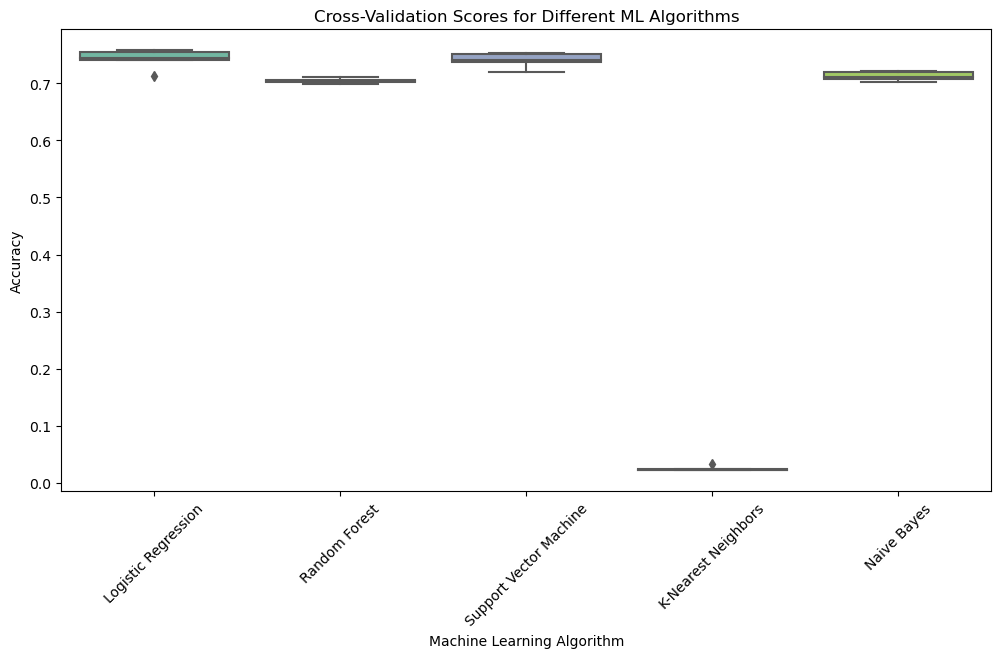

In [44]:
# Handle missing values in the 'Review' column
df['Review'].fillna("", inplace=True)

# If 'Rating_Category' column does not exist, create it based on ratings
if 'Rating_Category' not in df.columns:
    df['Rating_Category'] = pd.cut(df['Ratings'], bins=[0, 2, 3, 4, 5], 
                                   labels=["Poor", "Average", "Good", "Excellent"])

# Encode rating categories as numerical labels
label_encoder = LabelEncoder()
df['Rating_Category_Label'] = label_encoder.fit_transform(df['Rating_Category'])

# Text feature extraction using TF-IDF for the 'Review' column
tfidf = TfidfVectorizer(max_features=500)
X_text = tfidf.fit_transform(df['Review']).toarray()

# Only using text features for simplicity here
X = X_text
y = df['Rating_Category_Label']

# Define a dictionary of models to try
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": MultinomialNB()
}

# Store cross-validation results
cv_results = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
    cv_results[model_name] = scores
    print(f"{model_name} Cross-Validation Scores: {scores}")
    print(f"{model_name} Average Score: {scores.mean()}")

# Plotting the cross-validation results
plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.DataFrame(cv_results), palette="Set2")
plt.title("Cross-Validation Scores for Different ML Algorithms")
plt.ylabel("Accuracy")
plt.xlabel("Machine Learning Algorithm")
plt.xticks(rotation=45)
plt.show()

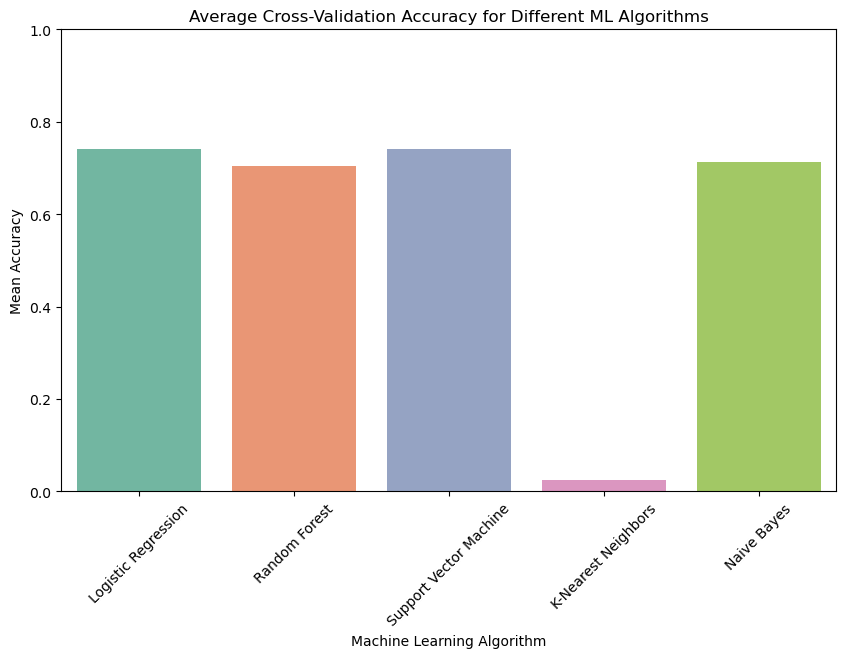

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#comparison of ML ALgo with bar graphs
# Assuming cv_results dictionary from the previous code
# Calculate the mean cross-validation score for each model
mean_cv_scores = {model_name: scores.mean() for model_name, scores in cv_results.items()}

# Convert the mean scores to a DataFrame for easy plotting
cv_df = pd.DataFrame(list(mean_cv_scores.items()), columns=['Model', 'Mean Accuracy'])

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean Accuracy', data=cv_df, palette="Set2")
plt.title("Average Cross-Validation Accuracy for Different ML Algorithms")
plt.ylabel("Mean Accuracy")
plt.xlabel("Machine Learning Algorithm")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1 for clarity
plt.show()

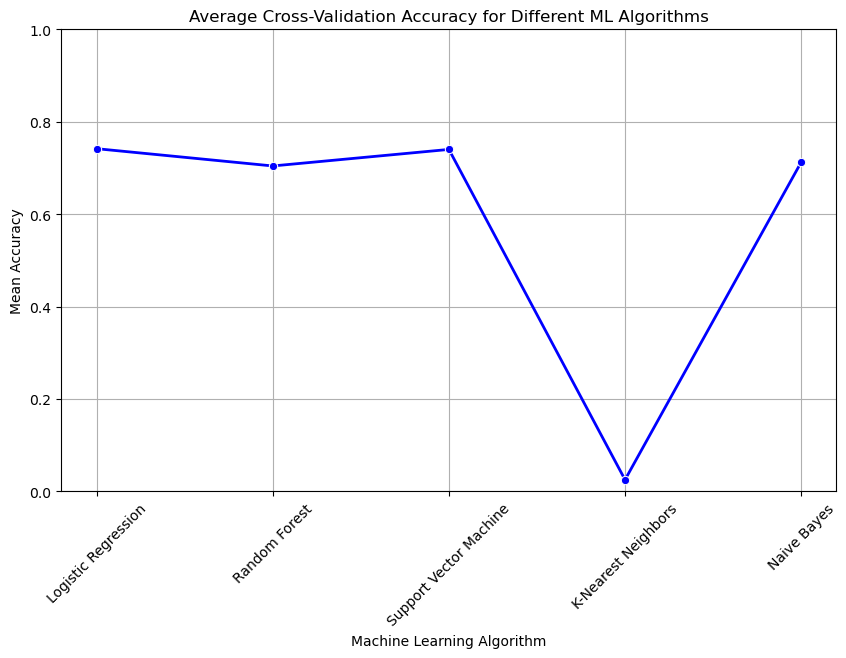

In [46]:
# Calculate the mean cross-validation score for each model
mean_cv_scores = {model_name: scores.mean() for model_name, scores in cv_results.items()}

# Convert the mean scores to a DataFrame for easy plotting
cv_df = pd.DataFrame(list(mean_cv_scores.items()), columns=['Model', 'Mean Accuracy'])

# Plotting the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model', y='Mean Accuracy', data=cv_df, marker='o', linewidth=2, color="b")
plt.title("Average Cross-Validation Accuracy for Different ML Algorithms")
plt.ylabel("Mean Accuracy")
plt.xlabel("Machine Learning Algorithm")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1 for clarity
plt.grid(visible=True)
plt.show()

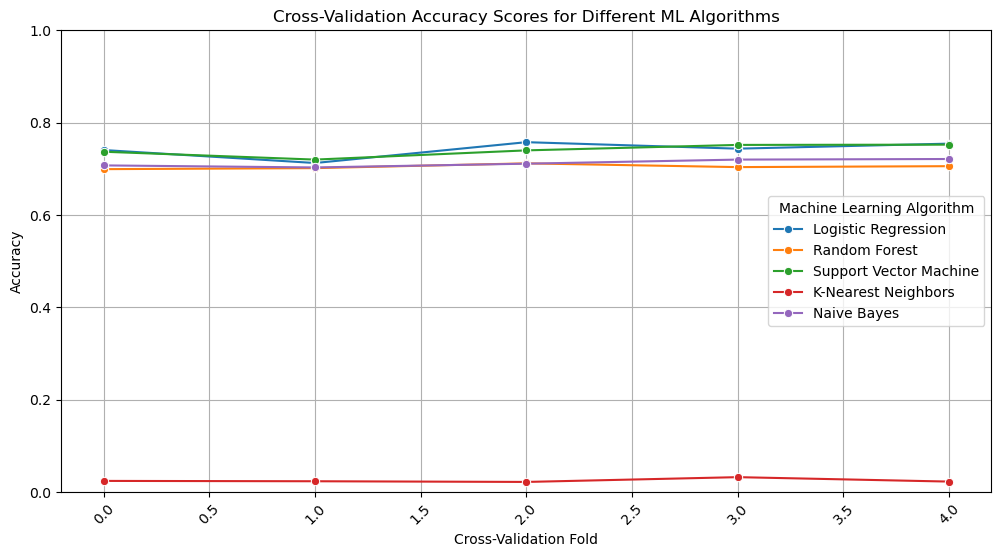

In [47]:
# Convert cv_results dictionary to a DataFrame format for multi-line plotting
# Assuming `cv_results` contains lists of accuracy scores for each model
cv_results_df = pd.DataFrame(cv_results)

# Plotting the line graph for each ML algorithm with a different color
plt.figure(figsize=(12, 6))

# Loop through each model in the cv_results_df to create a separate line for each
for model in cv_results_df.columns:
    sns.lineplot(data=cv_results_df[model], label=model, marker='o')

plt.title("Cross-Validation Accuracy Scores for Different ML Algorithms")
plt.ylabel("Accuracy")
plt.xlabel("Cross-Validation Fold")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1 for clarity
plt.legend(title="Machine Learning Algorithm")
plt.grid(visible=True)
plt.show()

File exists: True
Basic Info about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6764 entries, 0 to 6763
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     6759 non-null   object 
 1   Review   6759 non-null   object 
 2   Ratings  6758 non-null   float64
 3   Hotels   6759 non-null   object 
dtypes: float64(1), object(3)
memory usage: 211.5+ KB
None

Summary Statistics:
           Ratings
count  6758.000000
mean      4.370080
std       1.083561
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000

Checking for Missing Values:
Name       5
Review     5
Ratings    6
Hotels     5
dtype: int64


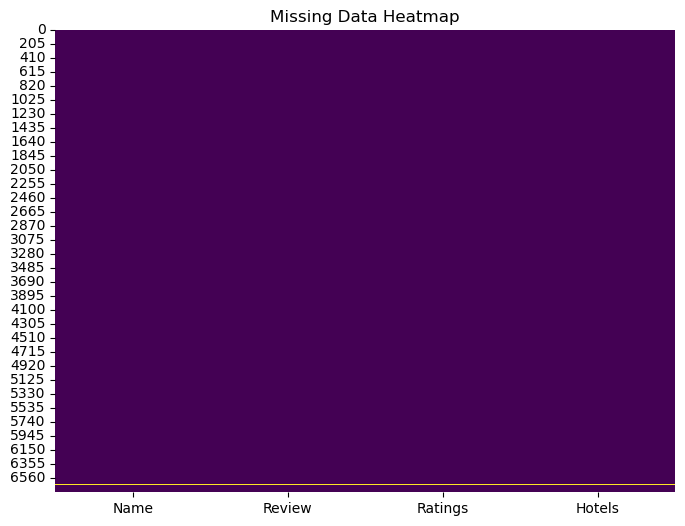

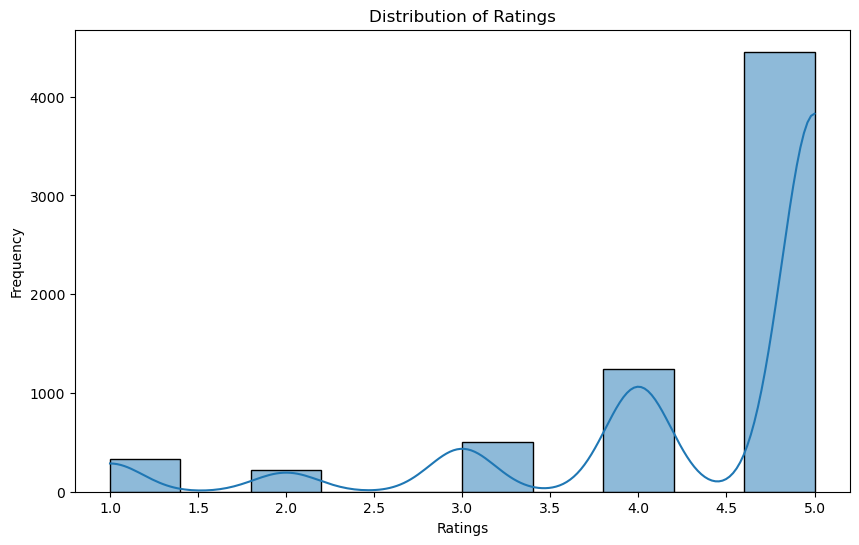

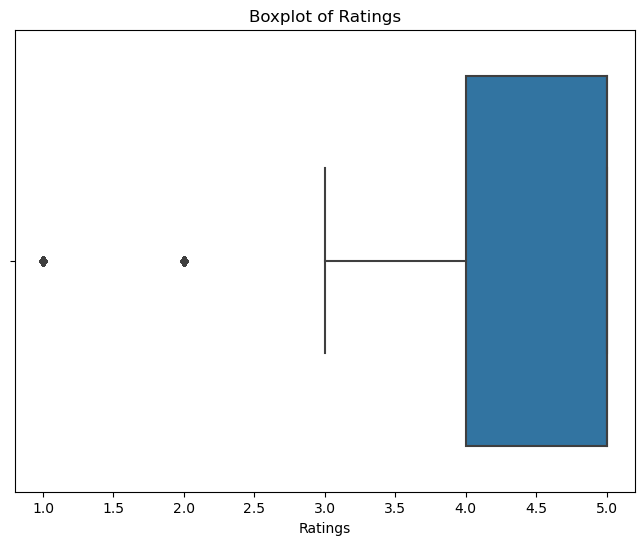

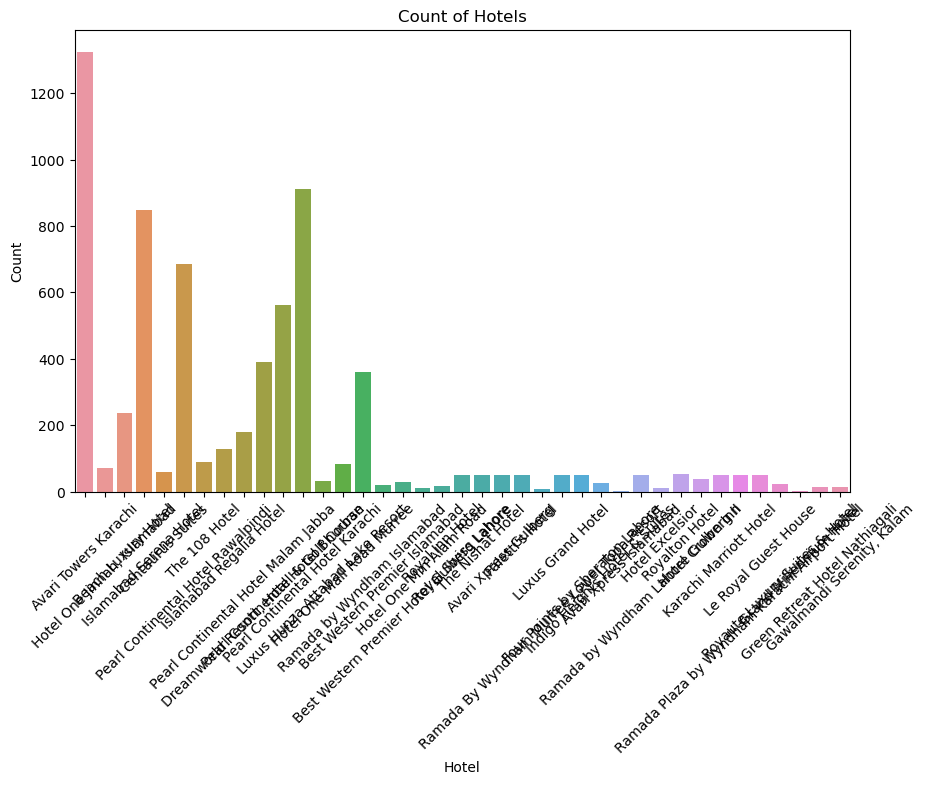

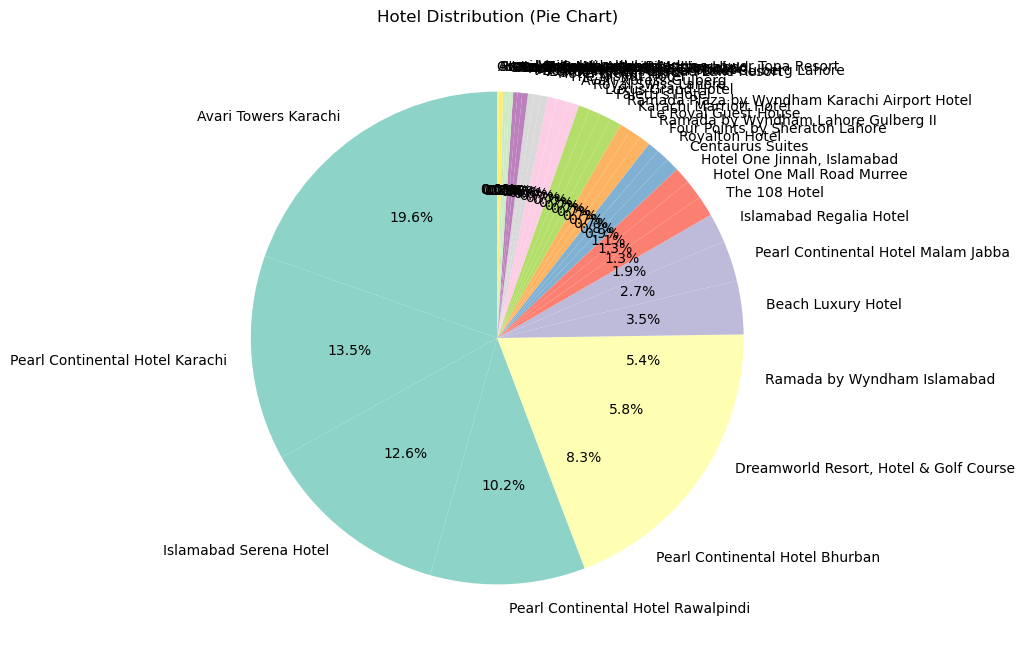

C:\Users\PMLS\AppData\Local\Temp\ipykernel_36616\902577655.py:62: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


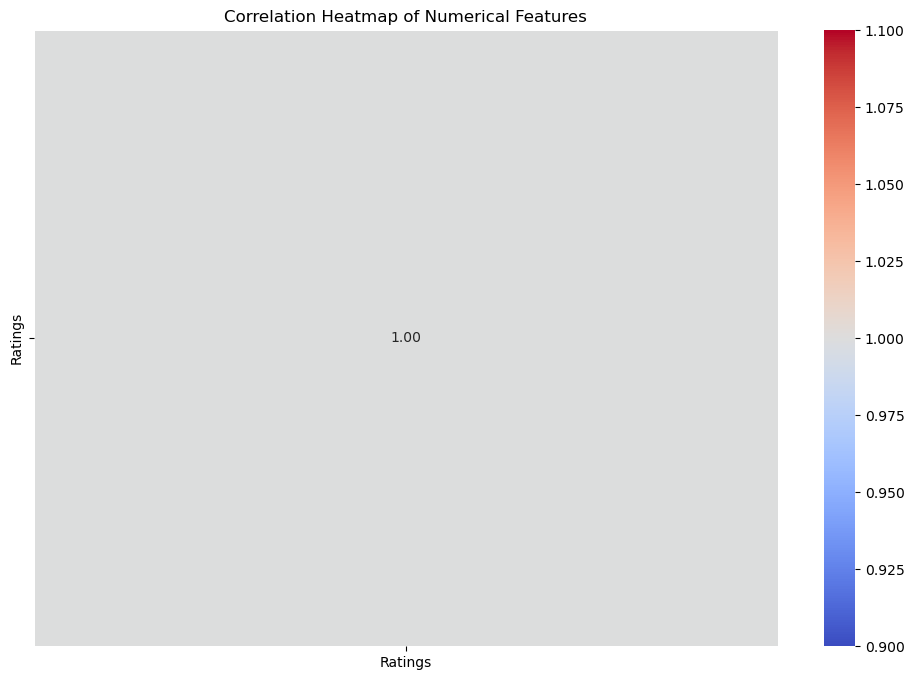

ValueError: No variables found for grid columns.

In [57]:
#Data preparation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
import os
csv_file = r"C:\Users\PMLS\Documents\Maleeha\Maleeha Zainab\Tourism-data.csv"
print("File exists:", os.path.exists(csv_file))
# Display the first few rows of the dataset
df = pd.read_csv(csv_file, encoding='utf-8')
# 1. Display basic information about the dataset
print("Basic Info about Dataset:")
print(df.info())

# 2. Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# 3. Check for missing values
print("\nChecking for Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)

# Visualize missing data
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# 4. Visualize the distribution of numerical features (e.g., Ratings)
plt.figure(figsize=(10, 6))
sns.histplot(df['Ratings'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

# 5. Boxplot to detect outliers in 'Ratings'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Ratings'])
plt.title('Boxplot of Ratings')
plt.show()

# 6. Count plot for categorical features (e.g., Hotels)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Hotels')
plt.title('Count of Hotels')
plt.xlabel('Hotel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 7. Pie chart for categorical feature distribution (e.g., Hotels)
plt.figure(figsize=(8, 8))
df['Hotels'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Hotel Distribution (Pie Chart)')
plt.ylabel('')
plt.show()

# 8. Correlation heatmap for numerical columns
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 9. Pairplot for visualizing relationships between numerical features
sns.pairplot(df, hue='Ratings', palette='Set1')
plt.title('Pairplot of Numerical Features')
plt.show()

# 10. Check for unique values in the 'Review' column (if categorical)
print("\nUnique values in 'Review' column:")
print(df['Review'].unique())

# 11. Visualize the sentiment distribution if applicable (e.g., sentiment-based analysis)
# This part requires 'Sentiment' column to be already mapped. You can map the sentiment as needed.

# 12. Checking data types to understand which columns need transformation (e.g., categorical encoding)
print("\nData Types of Columns:")
print(df.dtypes)

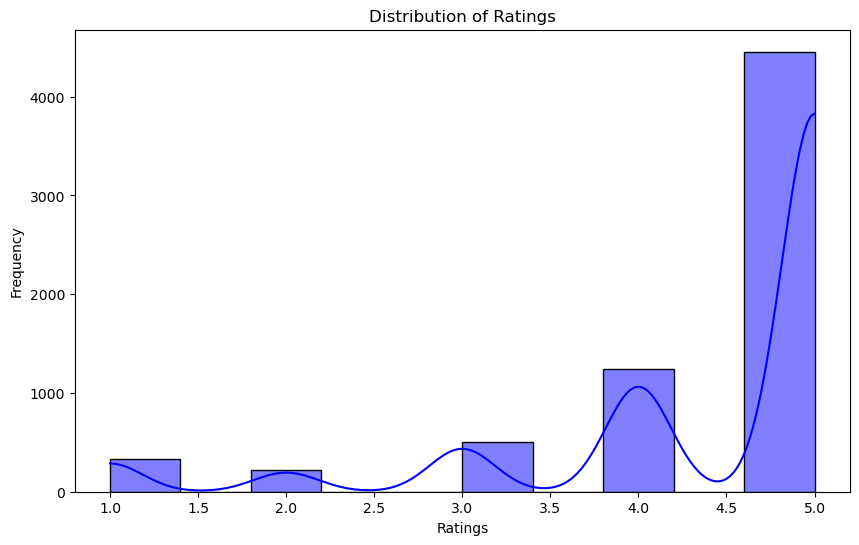

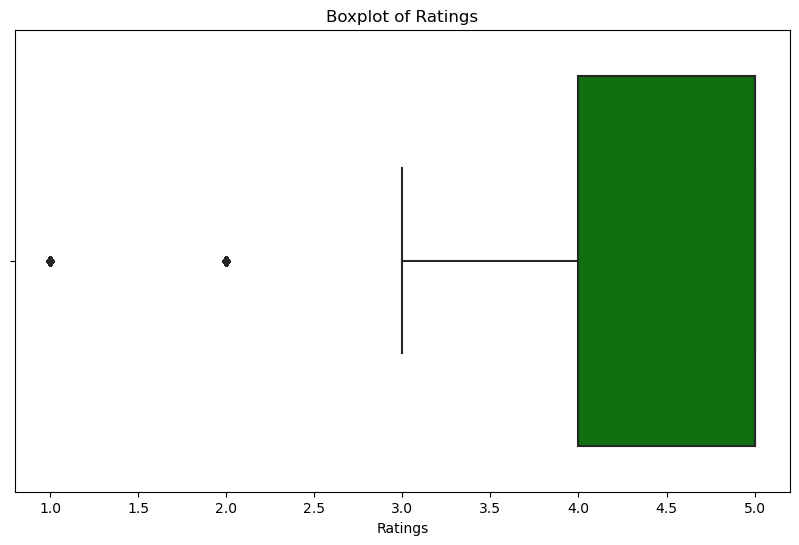

In [59]:
1.#summurize and  2 graphs of dataset  
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example: Assuming your dataset is loaded as 'df' and contains a 'Ratings' column
# If your dataset is different, adjust column names accordingly.

# Histogram for 'Ratings' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Ratings'], bins=10, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

# Boxplot to visualize the spread and detect outliers in 'Ratings'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Ratings'], color='green')
plt.title('Boxplot of Ratings')
plt.xlabel('Ratings')
plt.show()


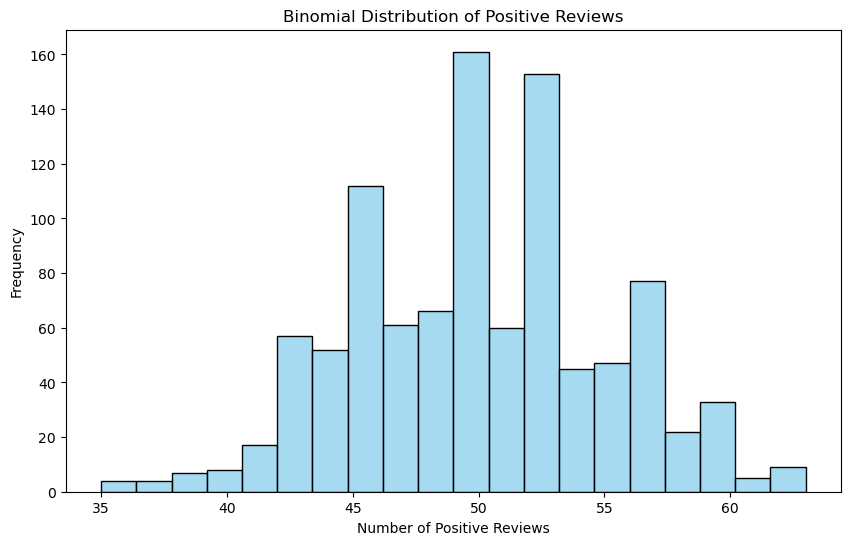

Mean of Binomial Distribution: 50.0
Variance of Binomial Distribution: 25.0


In [60]:
3.#Discrete distribution-binomial
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom

# Example: Let's assume 100 hotels and 50% probability of positive reviews
n_trials = 100  # Number of hotels (trials)
p_success = 0.5  # Probability of a positive review
size = 1000  # Number of simulations to model the binomial distribution

# Generating Binomial distribution data
binomial_data = binom.rvs(n=n_trials, p=p_success, size=size)

# Plotting the Binomial Distribution
plt.figure(figsize=(10, 6))
sns.histplot(binomial_data, kde=False, color='skyblue', bins=20)
plt.title('Binomial Distribution of Positive Reviews')
plt.xlabel('Number of Positive Reviews')
plt.ylabel('Frequency')
plt.show()

# Analyzing with the expected mean and variance
mean_binomial = n_trials * p_success
variance_binomial = n_trials * p_success * (1 - p_success)

print(f"Mean of Binomial Distribution: {mean_binomial}")
print(f"Variance of Binomial Distribution: {variance_binomial}")

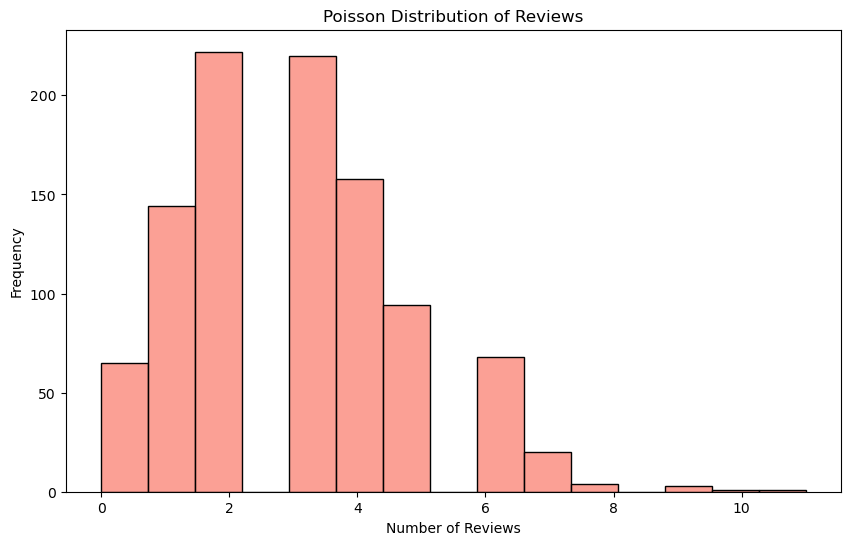

Mean of Poisson Distribution: 3
Variance of Poisson Distribution: 3


In [61]:
#3.discrete distribution-poisson
from scipy.stats import poisson

# Example: Assume the average number of reviews per hotel is 3
lambda_poisson = 3  # Average rate (lambda)

# Generating Poisson distribution data for the number of reviews
poisson_data = poisson.rvs(mu=lambda_poisson, size=size)

# Plotting the Poisson Distribution
plt.figure(figsize=(10, 6))
sns.histplot(poisson_data, kde=False, color='salmon', bins=15)
plt.title('Poisson Distribution of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

# Analyzing with the expected mean and variance
mean_poisson = lambda_poisson
variance_poisson = lambda_poisson  # In Poisson distribution, mean = variance

print(f"Mean of Poisson Distribution: {mean_poisson}")
print(f"Variance of Poisson Distribution: {variance_poisson}")

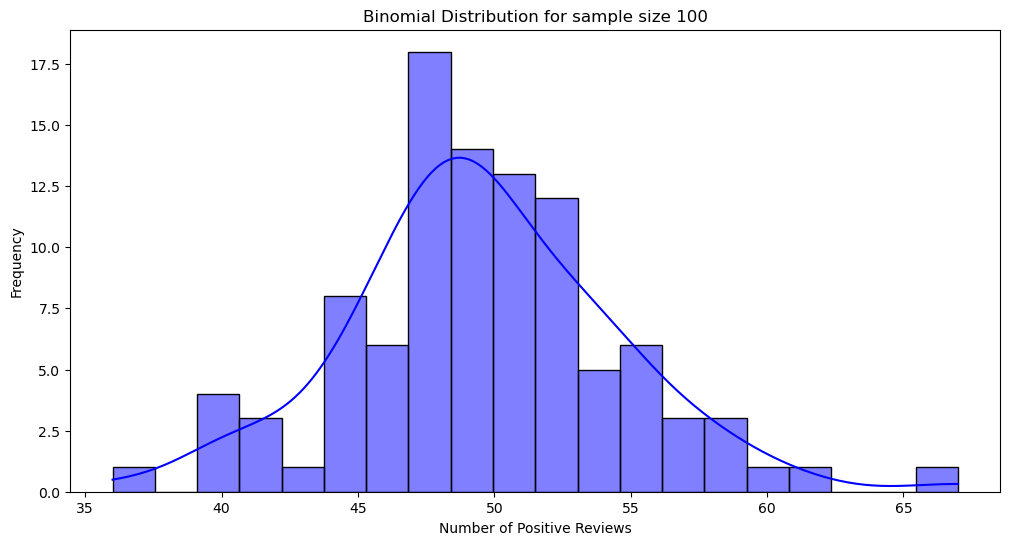

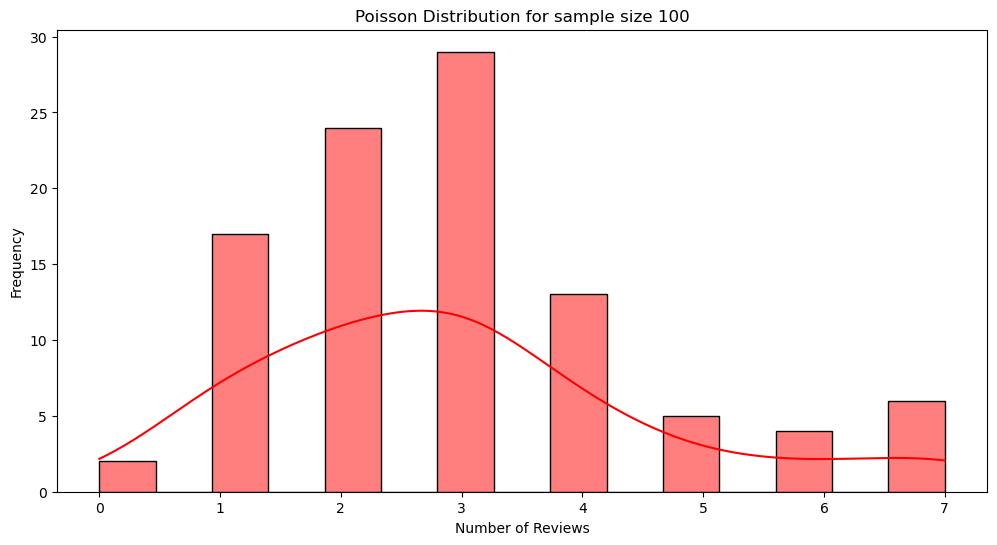

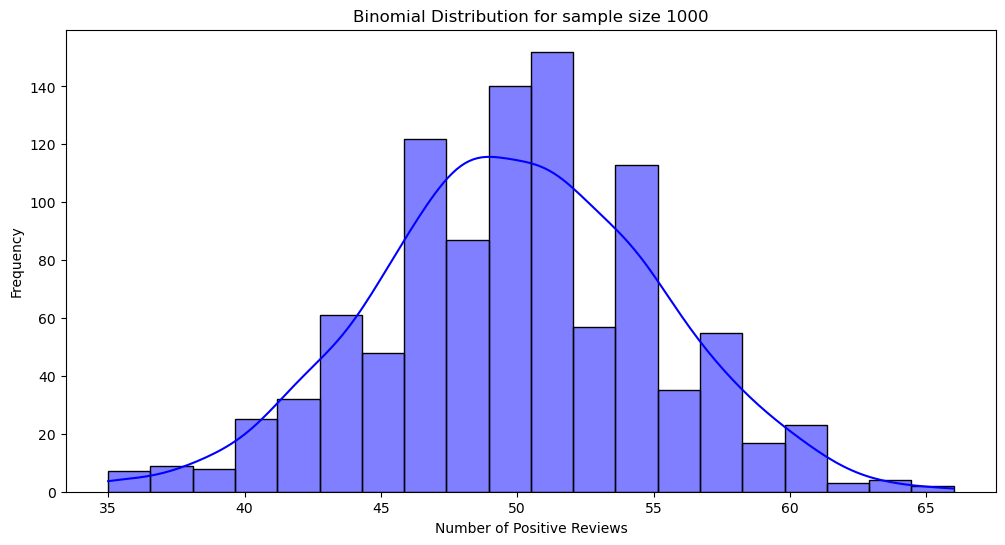

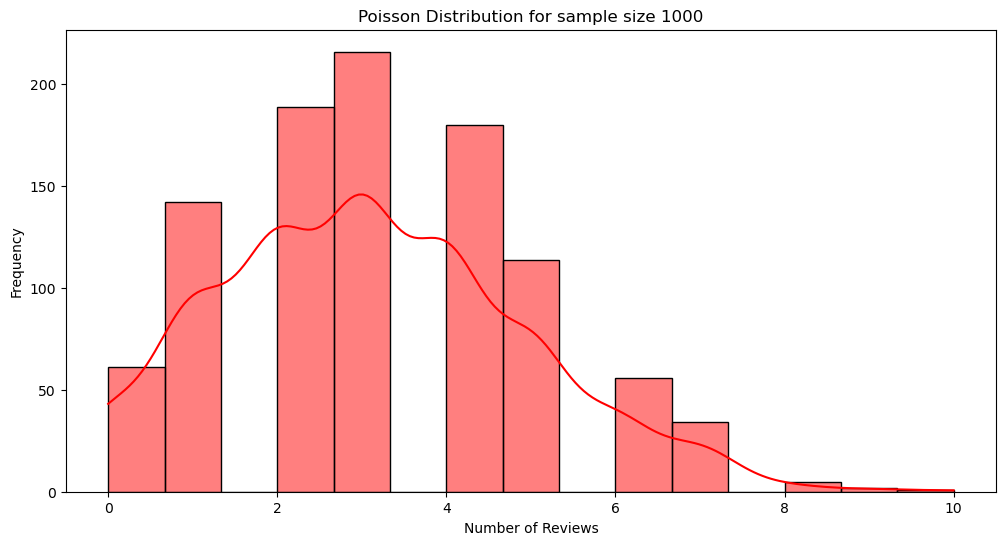

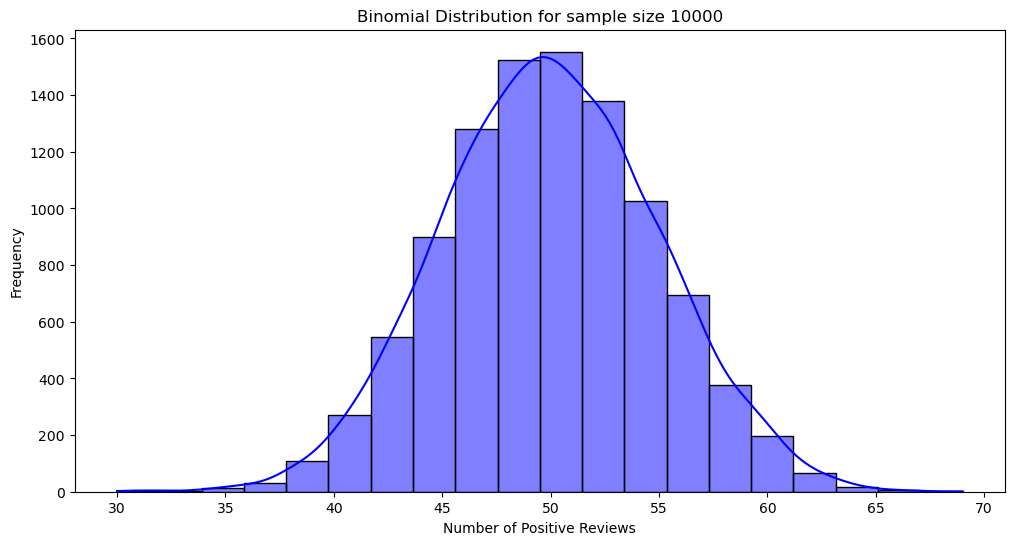

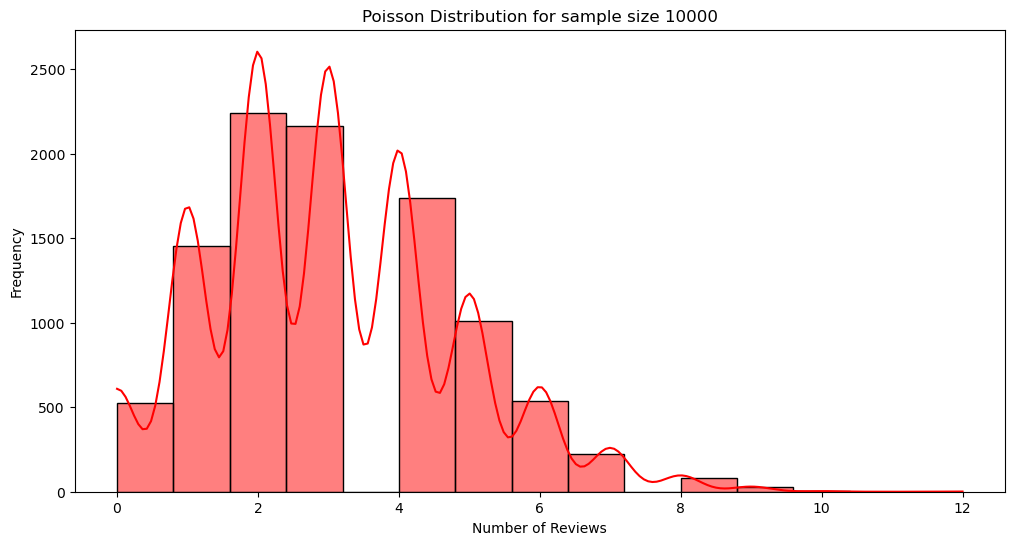

In [62]:
# 3. discrete distribution -Visualization and Comparison of binomial and poisson
sample_sizes = [100, 1000, 10000]

for size in sample_sizes:
    # Binomial Distribution
    binomial_data = binom.rvs(n=n_trials, p=p_success, size=size)
    plt.figure(figsize=(12, 6))
    sns.histplot(binomial_data, kde=True, color='blue', bins=20)
    plt.title(f'Binomial Distribution for sample size {size}')
    plt.xlabel('Number of Positive Reviews')
    plt.ylabel('Frequency')
    plt.show()

    # Poisson Distribution
    poisson_data = poisson.rvs(mu=lambda_poisson, size=size)
    plt.figure(figsize=(12, 6))
    sns.histplot(poisson_data, kde=True, color='red', bins=15)
    plt.title(f'Poisson Distribution for sample size {size}')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Frequency')
    plt.show()


6
6758
0
6758


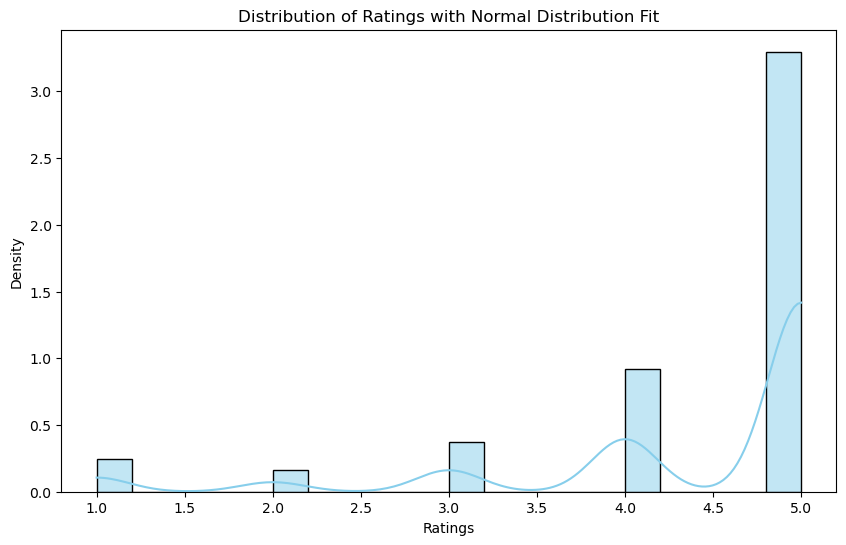

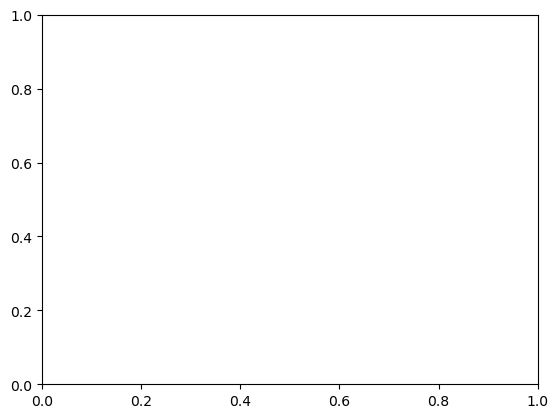

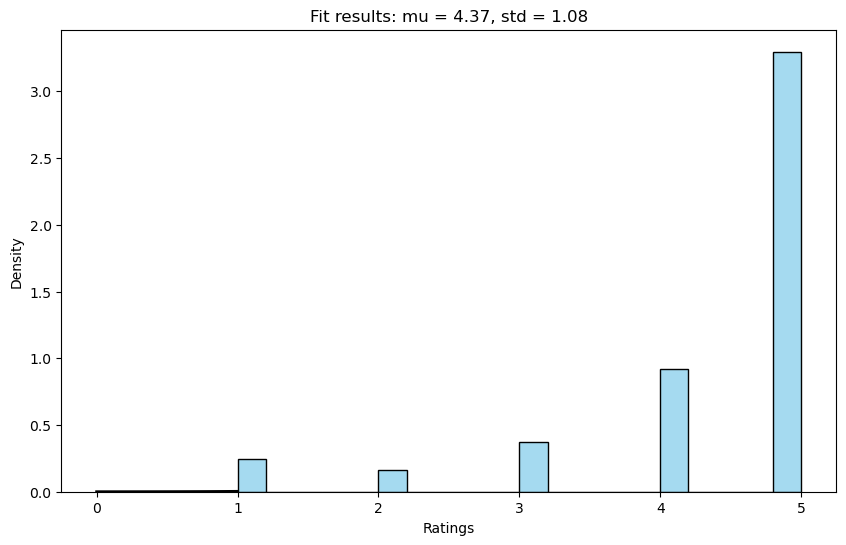

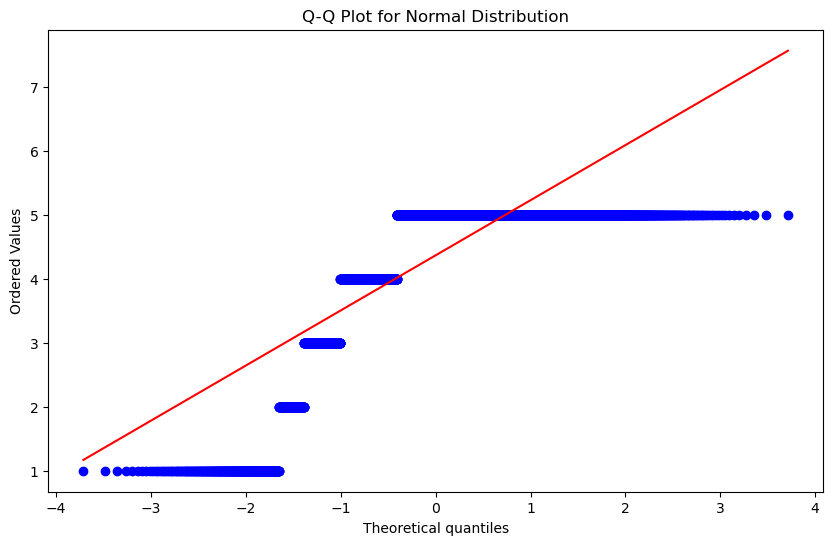

Mean of Ratings: 4.37
Standard Deviation of Ratings: 1.08


In [65]:
#4.Normal Distribution:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Step 1: Check for non-finite values in the 'Ratings' column
print(df['Ratings'].isna().sum())  # Check for NaN values
print(np.isfinite(df['Ratings']).sum())  # Check for non-finite (NaN or inf) values

# Step 2: Remove rows with NaN or infinite values
df_cleaned = df[np.isfinite(df['Ratings'])]  # Keep only rows where 'Ratings' is finite

# Step 3: Check if there are any remaining non-finite values
print(df_cleaned['Ratings'].isna().sum())  # Ensure no NaN values remain
print(np.isfinite(df_cleaned['Ratings']).sum())  # Ensure all values are finite

# Step 4: Visualize the cleaned Ratings data
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Ratings'], kde=True, stat="density", color="skyblue", bins=20)
plt.title("Distribution of Ratings with Normal Distribution Fit")
plt.xlabel("Ratings")
plt.ylabel("Density")
plt.show()

# Step 5: Fit a normal distribution to the cleaned data
mu, std = norm.fit(df_cleaned['Ratings'])

# Step 6: Plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Ratings'], kde=False, stat="density", color="skyblue", bins=20)
plt.plot(x, p, 'k', linewidth=2)
plt.title(f"Fit results: mu = {mu:.2f}, std = {std:.2f}")
plt.xlabel("Ratings")
plt.ylabel("Density")
plt.show()

# Step 7: Check normality with a Q-Q plot
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(df_cleaned['Ratings'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Normal Distribution')
plt.show()

# Step 8: Statistical Analysis - Mean and Standard Deviation
print(f"Mean of Ratings: {mu:.2f}")
print(f"Standard Deviation of Ratings: {std:.2f}")

In [68]:
#data visualization 
#2. preparing a dataset for machine learning (ML)
#.spilt dataset into test and train 
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['Ratings'])  # Features
y = df['Ratings']  # Target variable

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(5411, 3) (1353, 3) (5411,) (1353,)


In [69]:
#2.ML 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

In [70]:
# Features (X) and Labels (y)
X = df.drop(['Ratings'], axis=1)  # Assuming 'Ratings' is the target variable
y = df['Ratings']  # Assuming Ratings is your target column


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
# Define the models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)


In [73]:
# Hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [77]:
# Check for non-numeric columns
print(X.dtypes)

Name      object
Review    object
Hotels    object
dtype: object


In [80]:
from sklearn.preprocessing import LabelEncoder

# Assume 'Hotel Name' is a categorical feature
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
X['Hotels'] = label_encoder.fit_transform(X['Hotels'])

# If you have more columns to encode, apply label encoding similarly

In [81]:
# One-Hot Encoding for categorical columns
X = pd.get_dummies(X, drop_first=True)  # drop_first avoids multicollinearity


In [89]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler



# Step 1: Check the data types of each column
print(df.dtypes)

# Step 2: Select only numeric columns (drop non-numeric columns)
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# If you have non-numeric columns that need encoding, apply encoding here
# Example: If you have a column 'Name' that is categorical, apply LabelEncoder
label_encoder = LabelEncoder()
df['Name'] = label_encoder.fit_transform(df['Name'])  # Assuming 'Name' is a categorical column

# Step 3: Handle missing values (if any)
df_numeric = df_numeric.dropna()  # Drop rows with missing values

# Step 4: Scale the numeric data
scaler = StandardScaler()
df_numeric_scaled = scaler.fit_transform(df_numeric)

# Step 5: Convert the scaled data back into a DataFrame for easy visualization
df_scaled = pd.DataFrame(df_numeric_scaled, columns=df_numeric.columns)
print(df_scaled.head())

# Now you can use this preprocessed data for machine learning models like GridSearchCV or others.


Name        object
Review      object
Ratings    float64
Hotels      object
dtype: object
    Ratings
0  0.581643
1  0.581643
2  0.581643
3 -0.341717
4  0.581643


In [ ]:
#for the GridSearchCV and RandomziedSearchCV 

In [94]:
# Step 1: Identify non-numeric columns in the dataset
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['Review', 'Hotels'], dtype='object')


In [95]:
# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [96]:
# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, drop_first=True)


In [97]:
# Ensure all columns are numeric for ML
print(df.dtypes)


Name         int32
Review       int32
Ratings    float64
Hotels       int32
dtype: object


In [99]:
# Step 1: Identify and remove non-numeric columns from the dataset
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns (if they are not needed for prediction)
df_numeric = df.drop(columns=non_numeric_columns)


Non-numeric columns: Index([], dtype='object')


In [100]:
# Handle missing values (if any)
df_numeric = df_numeric.dropna()  # Option 1: Drop rows with missing values
# or
df_numeric = df_numeric.fillna(df_numeric.mean())  # Option 2: Fill missing values with mean


In [101]:
from sklearn.preprocessing import StandardScaler

# Feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric.drop(columns=['Ratings']))  # Assuming Ratings is the target
y = df_numeric['Ratings']

In [103]:
#ML and data Analytics 
#  Applying GridSearchCV for RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_scaled, y)

# Best hyperparameters and performance
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score (R2):", grid_search.best_score_)

# Example 2: Applying RandomizedSearchCV for LinearRegression
lr_model = LinearRegression()

# Define hyperparameters for RandomizedSearchCV (no hyperparameters for LR)
param_dist = {}  # Linear Regression has no hyperparameters to tune

# Apply RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=lr_model, param_distributions=param_dist, n_iter=10, cv=3)
random_search.fit(X_scaled, y)

# Best hyperparameters and performance
print("Best Hyperparameters (Random Search):", random_search.best_params_)
print("Best Score (R2):", random_search.best_score_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Score (R2): -0.06315816829188892
Best Hyperparameters (Random Search): {}
Best Score (R2): -0.02574665342349025


C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


                    Model  Mean Accuracy
0     Logistic Regression       0.741723
1           Random Forest       0.704317
2  Support Vector Machine       0.740096
3     K-Nearest Neighbors       0.025133
4             Naive Bayes       0.712450


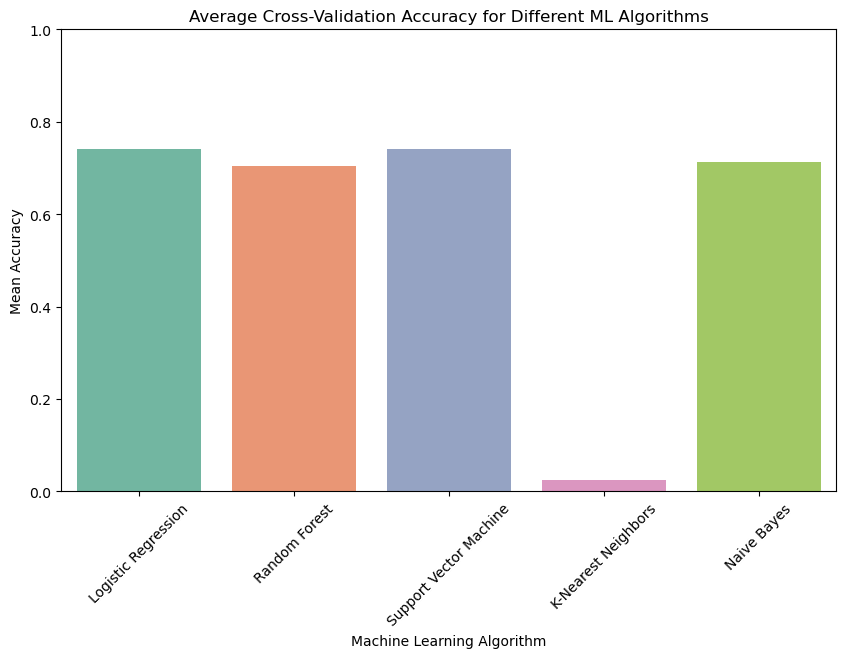

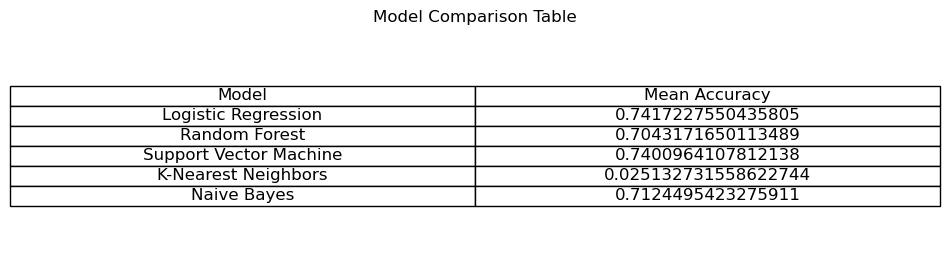

In [104]:
#cross validation and comparison with the help of table and graphs 
# Assuming 'cv_results' contains the cross-validation results for each algorithm
# For example, if cv_results = {'Model1': [0.85, 0.87, 0.88], 'Model2': [0.90, 0.92, 0.91]}

# Calculate the mean cross-validation score for each model
mean_cv_scores = {model_name: scores.mean() for model_name, scores in cv_results.items()}

# Convert the mean scores to a DataFrame for easy plotting and table display
cv_df = pd.DataFrame(list(mean_cv_scores.items()), columns=['Model', 'Mean Accuracy'])

# Display the table using pandas
print(cv_df)

# Plotting the bar graph for comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean Accuracy', data=cv_df, palette="Set2")
plt.title("Average Cross-Validation Accuracy for Different ML Algorithms")
plt.ylabel("Mean Accuracy")
plt.xlabel("Machine Learning Algorithm")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1 for clarity
plt.show()

# Plotting the comparison table using matplotlib
fig, ax = plt.subplots(figsize=(10, 3))  # Adjust size for better visibility
ax.axis('off')  # Hide axes
table_data = cv_df.values  # Convert DataFrame to array for the table

# Create the table
table = ax.table(cellText=table_data, colLabels=cv_df.columns, loc='center', cellLoc='center', colLoc='center')

# Customize the table appearance (optional)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Adjust table size

# Display the table
plt.title("Model Comparison Table")
plt.show()